<a href="https://colab.research.google.com/github/xhxuciedu/cs273p/blob/main/feedforward_neural_net_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is a simple example of a feedforward neural network implemented using PyTorch. This network is designed for a generic classification task, where the goal is to predict the class of an input vector. The network consists of an input layer, a few hidden layers, and an output layer. The exact number of layers and their sizes can be adjusted based on the specific requirements of your task.

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Check GPU availability

In [19]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
device

device(type='cuda')

## Define a feedforward neural net model

In [7]:
class FeedforwardNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNet, self).__init__()
        # First hidden layer
        self.hidden1 = nn.Linear(input_size, hidden_size)
        # Second hidden layer
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        # Output layer
        self.output = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Forward pass through the first hidden layer with ReLU activation
        x = F.relu(self.hidden1(x))
        # Forward pass through the second hidden layer with ReLU activation
        x = F.relu(self.hidden2(x))
        # Forward pass through the output layer
        x = self.output(x)
        return x

### Hypter-parameters

In [14]:
# model hyper-parameters
input_size = 784  # For MNIST dataset, for example
hidden_size = 500 # Number of hidden neurons
num_classes = 10  # Number of output classes (e.g., MNIST has 10 digits)

# training hyper-parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [21]:
# Create the neural network
model = FeedforwardNeuralNet(input_size, hidden_size, num_classes).to(device)

print(model)

FeedforwardNeuralNet(
  (hidden1): Linear(in_features=784, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=500, bias=True)
  (output): Linear(in_features=500, out_features=10, bias=True)
)


**Explanation of the code**

This code defines a neural network (`FeedforwardNeuralNet`) with two hidden layers, each followed by a ReLU activation function.

The `__init__` method initializes the layers of the network, and the `forward` method defines how the data flows through the network, i.e., it specifies the forward pass.

- `input_size`: The size of the input features (e.g., for the MNIST dataset, this would be 28x28=784, assuming you flatten the images into a 784-dimensional vector).
- `hidden_size`: The number of neurons in each hidden layer. You can adjust this based on the complexity of your task.
- `num_classes`: The number of output classes for your classification task.

### Dataset

In [11]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### Check the data and labels

In [22]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


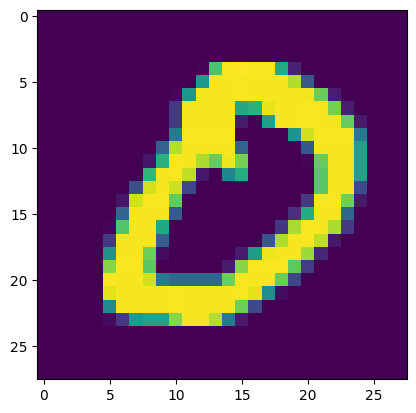

In [23]:
plt.imshow(images[1,0,:,:])

### Training

In [25]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
# Train the model
model.train
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.0262
Epoch [1/5], Step [200/600], Loss: 0.0171
Epoch [1/5], Step [300/600], Loss: 0.0291
Epoch [1/5], Step [400/600], Loss: 0.0123
Epoch [1/5], Step [500/600], Loss: 0.0882
Epoch [1/5], Step [600/600], Loss: 0.0238
Epoch [2/5], Step [100/600], Loss: 0.1208
Epoch [2/5], Step [200/600], Loss: 0.0723
Epoch [2/5], Step [300/600], Loss: 0.0645
Epoch [2/5], Step [400/600], Loss: 0.0130
Epoch [2/5], Step [500/600], Loss: 0.0046
Epoch [2/5], Step [600/600], Loss: 0.0165
Epoch [3/5], Step [100/600], Loss: 0.0127
Epoch [3/5], Step [200/600], Loss: 0.0306
Epoch [3/5], Step [300/600], Loss: 0.0634
Epoch [3/5], Step [400/600], Loss: 0.0300
Epoch [3/5], Step [500/600], Loss: 0.0312
Epoch [3/5], Step [600/600], Loss: 0.0310
Epoch [4/5], Step [100/600], Loss: 0.0385
Epoch [4/5], Step [200/600], Loss: 0.0013
Epoch [4/5], Step [300/600], Loss: 0.0123
Epoch [4/5], Step [400/600], Loss: 0.0317
Epoch [4/5], Step [500/600], Loss: 0.0444
Epoch [4/5], Step [600/600], Loss:

### Testing

In [29]:
def test_model(model, test_loader, device):
    """Evaluates the performance of a trained model on the test dataset."""
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation for efficiency
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.size(0), -1)  # Flatten images if needed

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the {total} test images: {accuracy:.2f} %')
    return accuracy

In [30]:
test_model(model, test_loader, device)

Accuracy of the network on the 10000 test images: 98.00 %


98.0

In [31]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

### Explanation of the code

This script does the following:

- Generates a synthetic dataset with 1000 samples where each sample has 784 features (like flattened images) and belongs to one of 10 classes.
- Defines a `DataLoader` for batch processing, which is essential for efficient training over large datasets.
- Sets up a training loop that iterates over the dataset in mini-batches, performs the forward pass to compute the output and loss, performs the backward pass to compute gradients, and updates the model parameters.

Replace the synthetic dataset with your actual data. If you're using a well-known dataset like MNIST, PyTorch's `torchvision` library provides convenient methods to download and load these datasets in a ready-to-use format.

Remember, the actual performance and the necessity of tuning hyperparameters such as the learning rate, the size of the hidden layers, and the batch size depend on the specific characteristics of your dataset and the complexity of the problem you're trying to solve.